In [151]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
#Read data files
df1= pd.read_csv('winequality-white.csv', sep = ';')
#df1  #(4898,12)
df2= pd.read_csv('winequality-red.csv', sep = ';')
#df2  #(1599,12)

In [153]:
#concatnate both the data file
df= df1.append(df2)
#df   #(6497,12)

In [154]:
#Defining features matrix and target matrix
x= np.asarray(df.drop('quality', axis=1))
#x  #(6497,11)
y= np.asarray(df['quality']).reshape(df.shape[0],1)
#y  #(6497,1)

In [155]:
#Standardization 
x = (x-x.mean())/x.std()
#y = (y-y.mean())/y.std()

In [156]:
#splitting into test set and training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
#x_train #(5197, 11)
#x_test   #(1300,11)
#y_train  #(5197,1)
#y_test   #(1300,1)

In [157]:
#Biased Term
unit = np.ones((x_train.shape[0], 1))
unit_test = np.ones((x_test.shape[0],1))
#unit
x_train = np.concatenate((unit, x_train), axis=1)
#x_train    #(5197,12)
x_test = np.concatenate((unit_test, x_test), axis=1)

In [158]:
#Regression 
#x_train.shape[1]
theta= np.zeros((x_train.shape[1],1))
#theta
y_predict = np.dot(x_train,theta)
#y_predict   #(5197,1)

In [159]:
#Batch Gradient descent
def train_model(itter, alpha, x_train, y_train, theta):
    J=np.ones(itter)
    for i in range(itter):
        #update theta using gradient descent
        theta = theta - (alpha/x_train.shape[0])*((np.dot((np.dot(x_train, theta)-y_train).T,x_train)).T)
        #Predicted y for each updated theta
        y_predict = np.dot(x_train, theta)
        #Cost Function
        J[i]= (1/(2*x_train.shape[0]))*(np.sum(np.square(np.dot(x_train, theta)-y_train), axis=0))
    return J,theta

In [160]:
J,theta= train_model(1000, 0.01, x_train, y_train, theta )

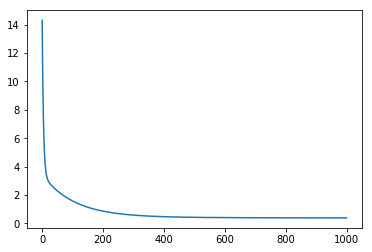

In [161]:
#Plot of cost v/s iterations 
plt.plot(J)


In [162]:
#cost function at each iteration
J[-1]

0.3857071586387342

In [163]:
#Trained theta after all iterations
theta

array([[ 2.66642885],
       [-0.58682335],
       [-1.11530622],
       [-1.11422629],
       [-0.96878142],
       [-1.13354174],
       [-0.00474872],
       [ 0.03808055],
       [-1.06615783],
       [-0.90202325],
       [-1.09312303],
       [-0.23183454]])

In [164]:
#predicted value for test set using trained model
y_predict_test = np.dot(x_test, theta)
y_predict_test

array([[5.92723953],
       [5.80076705],
       [5.70841196],
       ...,
       [5.74056589],
       [5.89427282],
       [5.85710488]])

In [165]:
#Absolute error
ma= (np.sum(np.absolute(y_predict_test-y_test)))/len(y_test)
ma

0.690698362345881

In [ ]:
#COST FUNCTION
Cost function measures the accuracy of hypothesis function.
J(theta) = (1/2*m)summation(square(y_predict-y_train))
In vector form,
J(theta) = (1/2*m)summation(((y_predict-y_train).Transpose)*(y_predict-y_train))

#DERIVATIVES 
Derivatives of cost function is used in gradient descent to update theta at each iterations.
Del(J(theta))= (1/m)*summation((y_predict-y_train)*x_train)
In vector form,
Del(J(theta))= (1/m)*(x_train.Transpose(y_predict-y_train))
